In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import astropy.units as u

import pysynphot as sp

In [2]:
from pysynphot import __version__ as psver
psver

'1.0.0'

In [6]:
feh_lmc = -0.5
feh_smc = -1.0

ebv_lmc = 0.13 # Massey et al. 2007
ebv_smc = 0.09

lmc_ext = sp.reddening.Extinction(ebv_lmc,'lmcavg') #Gordon et al. (2003, ApJ, 594, 279) R_V = 3.41)
smc_ext = sp.reddening.Extinction(ebv_smc,'smcbar') #R_V=2.74


#Values for B stars from Silaj et al. 2014, ApJ, 795:82 https://iopscience.iop.org/article/10.1088/0004-637X/795/1/82/pdf
B0_Teff = 2.5e4
B0_logg = 4.0
B0_R = (10.0 * u.Rsun).to(u.pc)
B9_Teff = 1.06e4
B9_logg = 4.1
B9_R = (2.7 * u.Rsun).to(u.pc)

In [7]:
#Some bookkeeping: we're going to load in the TESS bandpass, convolve with Vega to derive the zero-point
vega = sp.Vega

T_df = pd.read_csv('../data/tess-response-function-v2.0.csv',skiprows=7,names=['Wavelength','Transmission'])
T_bp = sp.ArrayBandpass(T_df['Wavelength'].values * 10.0, T_df['Transmission'], name='TESS')

vega_obs = sp.Observation(vega, T_bp)
vega_zp = vega_obs.effstim('obmag')
vega_zp

(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


-27.118853442069746

In [5]:
for gal,met,dm,ext in zip(['LMC','SMC'],[feh_lmc,feh_smc],[18.52,19.05],[lmc_ext,smc_ext]): #distance moduli from Kovacs 2000a,b
    
    dist = np.power(10.0, 1+(dm / 5.0)) * u.pc
    
    B0_cat = sp.Icat('k93models', B0_Teff, met, B0_logg) #Kurucz 1993 models
    B0_flux = B0_cat.flux * (B0_R/dist)**2.0
    B0 = sp.ArraySpectrum(B0_cat.wave,B0_flux,fluxunits='flam')
    B0_red = B0*ext
    B0_obs = sp.Observation(B0_red, T_bp)
    B0_mag = B0_obs.effstim('vegamag') #- vega_zp
    
    B9_cat = sp.Icat('k93models', B9_Teff, met, B9_logg) #Kurucz 1993 models
    B9_flux = B9_cat.flux * (B9_R/dist)**2.0
    B9 = sp.ArraySpectrum(B9_cat.wave,B9_flux,fluxunits='flam')
    B9_red = B9*ext
    B9_obs = sp.Observation(B9_red, T_bp)
    B9_mag = B9_obs.effstim('vegamag') #- vega_zp
    
    print(f'Main sequence B stars in the {gal} have typical TESS magnitudes of {B0_mag}-{B9_mag}')

(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Main sequence B stars in the LMC have typical TESS magnitudes of 14.965109540878695-19.233247338692518
(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Main sequence B stars in the SMC have typical TESS magnitudes of 15.350051026668217-19.60559564527261


In [13]:
F0Ia_temp = 6350
F0Ia_logg = 1.9 # alpha Per Lyubimkov+10

rig_teff = 12000
rig_logg = 2.5

met = -0.5 
dist = np.power(10.0, 1+(18.52 / 5.0)) * u.pc

F0_cat = sp.Icat('k93models', F0Ia_temp, met, F0Ia_logg)

rig_cat = sp.Icat('k93models', rig_teff, met, rig_logg)
B0_cat = sp.Icat('k93models', B0_Teff, met, B0_logg)

F0_flux = F0_cat.flux * ((200.0 * u.Rsun).to(u.pc)/dist)**2.0 
F0 = sp.ArraySpectrum(F0_cat.wave,F0_flux,fluxunits='flam') * lmc_ext
rig_flux = rig_cat.flux * ((50.0 * u.Rsun).to(u.pc)/dist)**2.0 
rig = sp.ArraySpectrum(rig_cat.wave,rig_flux,fluxunits='flam') * lmc_ext
B0_flux = B0_cat.flux * (B0_R/dist)**2.0
B0 = sp.ArraySpectrum(B0_cat.wave,B0_flux,fluxunits='flam') * lmc_ext

(1e-14, 1e-13)

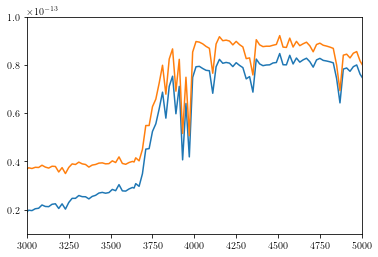

In [22]:
plt.plot(F0.wave,F0.flux)
plt.plot(F0.wave,F0.flux+B0.flux)
plt.xlim(3000,5000)
plt.ylim(0.1e-13,1.0e-13)

In [8]:
A0_teff = 1e4
A9_teff = 7.5e3
A0_mass = 2.1
A9_mass = 1.4
A0_rad = 1.8
A9_rad = 1.4

sun_logg = 4.43

A0_logg = np.log10(np.power(10.0,sun_logg) * A0_mass / (A0_rad ** 2.0))
A9_logg = np.log10(np.power(10.0,sun_logg) * A9_mass / (A9_rad ** 2.0))
print(A0_logg,A9_logg)

for gal,met,dm,ext in zip(['LMC','SMC'],[feh_lmc,feh_smc],[18.52,19.05],[lmc_ext,smc_ext]): #distance moduli from Kovacs 2000a,b
    
    dist = np.power(10.0, 1+(dm / 5.0)) * u.pc
    
    A0_cat = sp.Icat('k93models', A0_teff, met, A0_logg) #Kurucz 1993 models
    A0_flux = A0_cat.flux * ((A0_rad*u.Rsun).to(u.pc)/dist)**2.0
    A0 = sp.ArraySpectrum(A0_cat.wave,A0_flux,fluxunits='flam')
    A0_red = A0*ext
    A0_obs = sp.Observation(A0_red, T_bp)
    A0_mag = A0_obs.effstim('vegamag') #- vega_zp
    
    A9_cat = sp.Icat('k93models', A9_teff, met, A9_logg) #Kurucz 1993 models
    A9_flux = A9_cat.flux * ((A9_rad*u.Rsun).to(u.pc)/dist)**2.0
    A9 = sp.ArraySpectrum(A9_cat.wave,A9_flux,fluxunits='flam')
    A9_red = A9*ext
    A9_obs = sp.Observation(A9_red, T_bp)
    A9_mag = A9_obs.effstim('vegamag') #- vega_zp
    
    
    print(f'Main sequence A stars in the {gal} have typical TESS magnitudes of {A0_mag}-{A9_mag}')

4.241674284527307 4.2838719643217615
(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Main sequence A stars in the LMC have typical TESS magnitudes of 20.224457461998693-21.46184924824732
(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(TESS) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
Main sequence A stars in the SMC have typical TESS magnitudes of 20.59512953899394-21.83747046382551
